----------------------------------
       1.Data Selection           
----------------------------------

    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.38             0.53               2                   157   
1                 0.80             0.86               5                   262   
2                 0.11             0.88               7                   272   
3                 0.72             0.87               5                   223   
4                 0.37             0.52               2                   159   
5                 0.41             0.50               2                   153   
6                 0.10             0.77               6                   247   
7                 0.92             0.85               5                   259   
8                 0.89             1.00               5                   224   
9                 0.42             0.53               2                   142   
10 

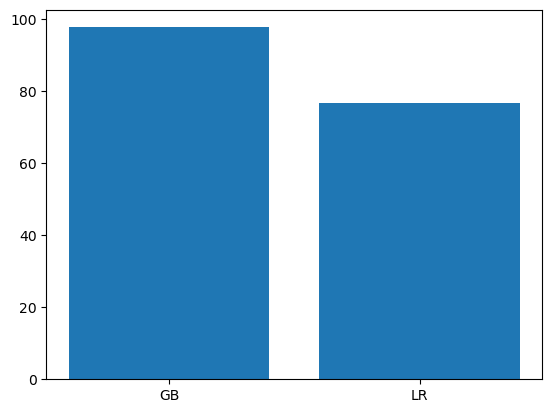

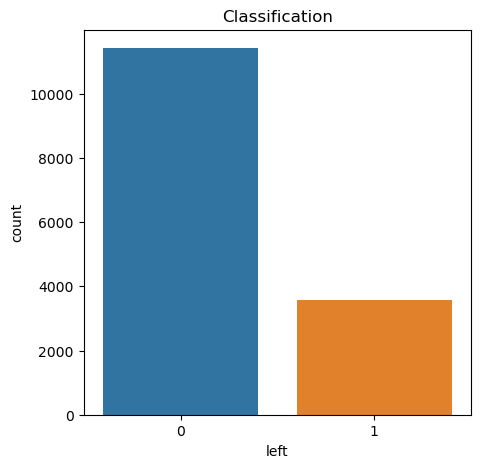

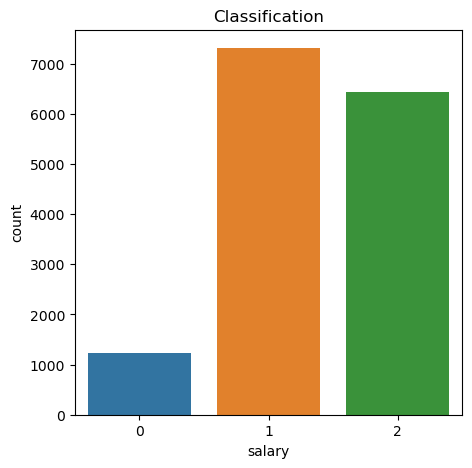

In [1]:
#======================= IMPORT PACKAGES =============================

import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn import preprocessing

#===================== DATA SELECTION ==============================

#=== READ A DATASET ====

data_frame=pd.read_csv("HRAnalytics.csv")
print("----------------------------------")
print("       1.Data Selection           ")
print("----------------------------------")
print()
print(data_frame.head(20))


#===================== DATA PREPROCESSING ==============================

#=== CHECK MISSING VALUES ===

print("=====================================================")
print("                    2.Preprocessing                  ")
print("=====================================================")
print()
print("--------------------------------------------")
print("       Checking missing values        ")
print("--------------------------------------------")
print()
print(data_frame.isnull().sum())
print()


#===  LABEL ENCODING ===

label_encoder = preprocessing.LabelEncoder() 

print("---------------------------------")
print(" Before label encoding ")
print("---------------------------------")
print()
print(data_frame['salary'].head(10))

data_frame['salary']=label_encoder.fit_transform(data_frame['salary'])
data_frame['sales']=label_encoder.fit_transform(data_frame['sales'])


print("-------------------------------------------")
print(" After label Encoding ")
print("------------------------------------------")
print()

print(data_frame['salary'].head(20))


#============================= DATA SPILLTING =========================


X = data_frame.drop("left",axis=1)
Y = data_frame["left"]

print("----------------------------------------")
print("DATA SPLITTING")
print("------------------------------------")
print()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


print()
print("Total Number Of data      = ", len(X))
print()
print("Total Number Of Test data = ", len(x_test))
print()
print("Total Number Of Train data = ", len(x_train))
print()


#============================= CLASSIFICATION =========================

 # === LOGISTIC REGRESSION =====

from sklearn import linear_model

lr = linear_model.LogisticRegression()
 
# fit the regressor with x and y data
lr.fit(x_train, y_train) 

Y_pred = lr.predict(x_train)

from sklearn import metrics

Accuracy_lr=metrics.accuracy_score(y_train,Y_pred)*100
 
 
print("----------------------------------------")
print("LOGISTIC REGRESSION --> LR")
print("------------------------------------")
print()
print("1. Accuracy =",Accuracy_lr )
print()
print(metrics.classification_report(y_train,Y_pred))



# ==== GRADIENT BOOSTING ====


from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier()

gbt.fit(x_train, y_train)

y_pred_gbt = gbt.predict(x_train)

from sklearn import metrics

acc_gbt=metrics.accuracy_score(y_pred_gbt,y_train)*100

print("----------------------------------------")
print(" GBDT ")
print("----------------------------------------")
print()
print("1. Accuracy = ", acc_gbt)
print()
print(metrics.classification_report(y_pred_gbt,y_train))
print()


# ============== PREDICTION =====================

print("----------------------------------------")
print("PREDICTION ")
print("------------------------------------")
print()

for i in range(0,5):
    if Y_pred[i]==0:
        print("-----------------------------")
        print([i],"The Candidate is selected")
        print("-----------------------------")
    else:
        print("----------------------------------")
        print([i],"The Candidate is Non- selected")
        print("----------------------------------")        

# ===== COMPARISON =====

vals=[acc_gbt,Accuracy_lr]
inds=range(len(vals))
labels=["GB","LR"]
fig,ax = plt.subplots()
rects = ax.bar(inds, vals)
ax.set_xticks([ind for ind in inds])
ax.set_xticklabels(labels)
plt.show()


import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Classification")
sns.countplot(x='left',data=data_frame)
plt.show()

import seaborn as sns
plt.figure(figsize=(5, 5))
plt.title("Classification")
sns.countplot(x='salary',data=data_frame)
plt.show()

